In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy import stats

In [3]:
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from lifelines.plotting import plot_lifetimes

/var/folders/93/795zm8c93m16_92qkk86t0_r0000gn/T/ipykernel_72000/1372225160.py:8: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  actual_subs = np.array([[func1.rvs(), func2.rvs()][func3.rvs() < 0.5]


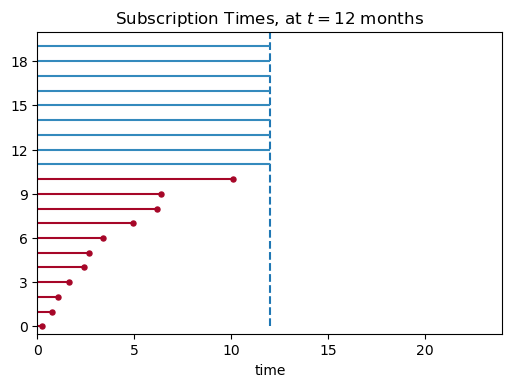

In [4]:
N = 20
study_duration = 12

func1 = stats.expon(scale=18)
func2 = stats.expon(scale=3)
func3 = stats.uniform()

actual_subs = np.array([[func1.rvs(), func2.rvs()][func3.rvs() < 0.5]
                        for i in range(N)])
observed_subs = np.minimum(actual_subs, study_duration)
observed = actual_subs < study_duration

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.vlines(12, 0, 30, lw=1.5, lss="--")
plot_lifetimes(observed_subs, event_observed=observed, ax=ax)
ax.set(xlim=(0, 24),
       xlabel='time',
       title='Subscription Times, at $t=12$ months')
plt.show()

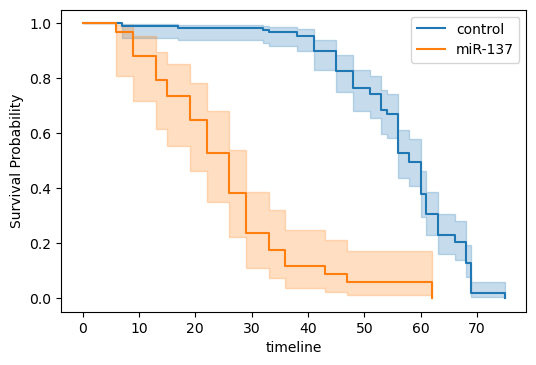

In [5]:
df = load_waltons()

T = df['T']
E = df['E']
groups = df['group']
ix = (groups == 'miR-137')

kmf = KaplanMeierFitter()

_, ax = plt.subplots(figsize=(6, 4), dpi=100)

kmf.fit(T[~ix], E[~ix], label='control')
kmf.plot(ax=ax)
kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

ax.set(ylabel='Survival Probability')
ax.legend()

plt.show()